<a href="https://colab.research.google.com/github/idjoopal/DL_tensorflow2.0/blob/main/%EC%8B%A4%EC%8A%B5_2_%ED%95%99%EC%8A%B5%EA%B0%9C%EC%84%A0%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Activation / Loss / Optimizer

In [1]:
import tensorflow as tf 
from tensorflow.keras.layers import Dense, Flatten 
from tensorflow.keras.models import Sequential

# 기존 신경망 아키텍처에 조건 바꿔 적용해보기

[tf.keras.activations docs](https://www.tensorflow.org/api_docs/python/tf/keras/activations)

[tf.keras.losses docs](https://www.tensorflow.org/api_docs/python/tf/keras/losses)

[tf.keras.optimizer docs](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)

In [2]:
# data load
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 0~255의 픽셀 값을 0~1로 조정
x_train, x_test = x_train / 255.0, x_test / 255.0

# shape 조정
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

# 정답 label을 길이10 벡터화
y_train = tf.one_hot(y_train, depth=10)
y_test = tf.one_hot(y_test, depth=10)

# validation set 별도 구분
x_train, x_val = x_train[:50000], x_train[50000:]
y_train, y_val = y_train[:50000], y_train[50000:]

11493376/11490434 [==============================] - 0s 0us/step


모델 구현하기

In [3]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
  tf.keras.layers.Dense(50, activation='sigmoid'),
  tf.keras.layers.Dense(10, activation='softmax')
])

# 커스터마이징을 위해선 기존 방식 이용, 기본 기능 활용하려면 string으로 이름을 입력

# 커스터마이징
# sgd_optimizer = tf.keras.optimizers.SGD(learning_rate=1.0) 
# mse_loss = tf.keras.losses.MeanSquaredError()
# model.compile(optimizer=sgd_optimizer, loss=mse_loss, metrics=['accuracy'])  

# 기본 기능 활용
model.compile(optimizer='sgd',loss='mean_squared_error',metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val), verbose=2)
result = model.evaluate(x_test,  y_test, verbose=2)

Epoch 1/10
1563/1563 - 3s - loss: 0.0931 - accuracy: 0.1433 - val_loss: 0.0911 - val_accuracy: 0.1603
Epoch 2/10
1563/1563 - 3s - loss: 0.0901 - accuracy: 0.1663 - val_loss: 0.0893 - val_accuracy: 0.1873
Epoch 3/10
1563/1563 - 3s - loss: 0.0887 - accuracy: 0.2188 - val_loss: 0.0881 - val_accuracy: 0.2576
Epoch 4/10
1563/1563 - 3s - loss: 0.0877 - accuracy: 0.2893 - val_loss: 0.0871 - val_accuracy: 0.3431
Epoch 5/10
1563/1563 - 3s - loss: 0.0867 - accuracy: 0.3520 - val_loss: 0.0861 - val_accuracy: 0.3848
Epoch 6/10
1563/1563 - 3s - loss: 0.0858 - accuracy: 0.3828 - val_loss: 0.0851 - val_accuracy: 0.4093
Epoch 7/10
1563/1563 - 3s - loss: 0.0848 - accuracy: 0.4060 - val_loss: 0.0840 - val_accuracy: 0.4254
Epoch 8/10
1563/1563 - 3s - loss: 0.0837 - accuracy: 0.4239 - val_loss: 0.0829 - val_accuracy: 0.4387
Epoch 9/10
1563/1563 - 3s - loss: 0.0825 - accuracy: 0.4385 - val_loss: 0.0816 - val_accuracy: 0.4470
Epoch 10/10
1563/1563 - 3s - loss: 0.0813 - accuracy: 0.4448 - val_loss: 0.0803 - 

# 실습 MISSION
위에서 작성했던 코드를 조건에 맞게 변경해보자!

* activation을 relu로 변경
* loss를 cross-entropy로 변경 ('categorical_crossentropy', 상기 링크 참고)
* optimizer를 adam으로 변경

In [4]:
# MISSION을 작성하세요
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
  tf.keras.layers.Dense(50, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

# 커스터마이징을 위해선 기존 방식 이용, 기본 기능 활용하려면 string으로 이름을 입력

# 커스터마이징
# sgd_optimizer = tf.keras.optimizers.SGD(learning_rate=1.0) 
# mse_loss = tf.keras.losses.MeanSquaredError()
# model.compile(optimizer=sgd_optimizer, loss=mse_loss, metrics=['accuracy'])  

# 기본 기능 활용
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val), verbose=2)
result = model.evaluate(x_test,  y_test, verbose=2)

Epoch 1/10
1563/1563 - 4s - loss: 0.3455 - accuracy: 0.9038 - val_loss: 0.1900 - val_accuracy: 0.9464
Epoch 2/10
1563/1563 - 3s - loss: 0.1724 - accuracy: 0.9503 - val_loss: 0.1458 - val_accuracy: 0.9618
Epoch 3/10
1563/1563 - 3s - loss: 0.1314 - accuracy: 0.9619 - val_loss: 0.1243 - val_accuracy: 0.9651
Epoch 4/10
1563/1563 - 3s - loss: 0.1062 - accuracy: 0.9681 - val_loss: 0.1160 - val_accuracy: 0.9669
Epoch 5/10
1563/1563 - 3s - loss: 0.0869 - accuracy: 0.9745 - val_loss: 0.1075 - val_accuracy: 0.9684
Epoch 6/10
1563/1563 - 3s - loss: 0.0747 - accuracy: 0.9773 - val_loss: 0.1015 - val_accuracy: 0.9724
Epoch 7/10
1563/1563 - 3s - loss: 0.0639 - accuracy: 0.9812 - val_loss: 0.0992 - val_accuracy: 0.9727
Epoch 8/10
1563/1563 - 3s - loss: 0.0562 - accuracy: 0.9827 - val_loss: 0.1024 - val_accuracy: 0.9716
Epoch 9/10
1563/1563 - 3s - loss: 0.0488 - accuracy: 0.9848 - val_loss: 0.1008 - val_accuracy: 0.9724
Epoch 10/10
1563/1563 - 3s - loss: 0.0437 - accuracy: 0.9866 - val_loss: 0.1057 - 

# 실습 MISSION
다양한 optimizer를 테스트하고 수렴 속도를 확인하자

위 MISSION에서 작성한 모델을 활용, 
두 개의 서로다른 모델(model_sgd, model_sgdm)을 만들어 아래 두 optimizer를 각각 적용하고 빌드하여 history를 다른이름으로 저장(history_sgd, history_sgdm)한 뒤 그래프로 나타내시오

* SGD (기본설정)
* SGD with learning rate 0.1, momentum 0.1

(힌트, learning rate를 수정해보았던 것처럼 momentum 값도 커스터마이징할 수 있습니다!)

In [6]:
# MISSION을 작성하세요
model_sgd = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
  tf.keras.layers.Dense(50, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model_sgdm = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
  tf.keras.layers.Dense(50, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
# 커스터마이징을 위해선 기존 방식 이용, 기본 기능 활용하려면 string으로 이름을 입력

# 커스터마이징
# sgd_optimizer = tf.keras.optimizers.SGD(learning_rate=1.0) 
# mse_loss = tf.keras.losses.MeanSquaredError()
# model.compile(optimizer=sgd_optimizer, loss=mse_loss, metrics=['accuracy'])  

# 기본 기능 활용
sgd_optimizer = tf.keras.optimizers.SGD()
model_sgd.compile(optimizer=sgd_optimizer,loss='mean_squared_error',metrics=['accuracy'])

sgd_optimizer = tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.1) 
model_sgdm.compile(optimizer=sgd_optimizer,loss='mean_squared_error',metrics=['accuracy'])

history_sgd = model_sgd.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val), verbose=2)
result_sgd = model_sgd.evaluate(x_test,  y_test, verbose=2)

history_sgdm = model_sgdm.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val), verbose=2)
result_sgdm = model_sgdm.evaluate(x_test,  y_test, verbose=2)

Epoch 1/10
1563/1563 - 3s - loss: 0.0887 - accuracy: 0.2008 - val_loss: 0.0853 - val_accuracy: 0.3261
Epoch 2/10
1563/1563 - 3s - loss: 0.0813 - accuracy: 0.3992 - val_loss: 0.0763 - val_accuracy: 0.4781
Epoch 3/10
1563/1563 - 3s - loss: 0.0716 - accuracy: 0.5196 - val_loss: 0.0656 - val_accuracy: 0.5755
Epoch 4/10
1563/1563 - 3s - loss: 0.0614 - accuracy: 0.6053 - val_loss: 0.0555 - val_accuracy: 0.6763
Epoch 5/10
1563/1563 - 3s - loss: 0.0524 - accuracy: 0.7165 - val_loss: 0.0466 - val_accuracy: 0.7868
Epoch 6/10
1563/1563 - 3s - loss: 0.0445 - accuracy: 0.7878 - val_loss: 0.0390 - val_accuracy: 0.8294
Epoch 7/10
1563/1563 - 3s - loss: 0.0382 - accuracy: 0.8191 - val_loss: 0.0334 - val_accuracy: 0.8502
Epoch 8/10
1563/1563 - 3s - loss: 0.0336 - accuracy: 0.8353 - val_loss: 0.0294 - val_accuracy: 0.8618
Epoch 9/10
1563/1563 - 3s - loss: 0.0303 - accuracy: 0.8463 - val_loss: 0.0265 - val_accuracy: 0.8701
Epoch 10/10
1563/1563 - 3s - loss: 0.0278 - accuracy: 0.8540 - val_loss: 0.0244 - 

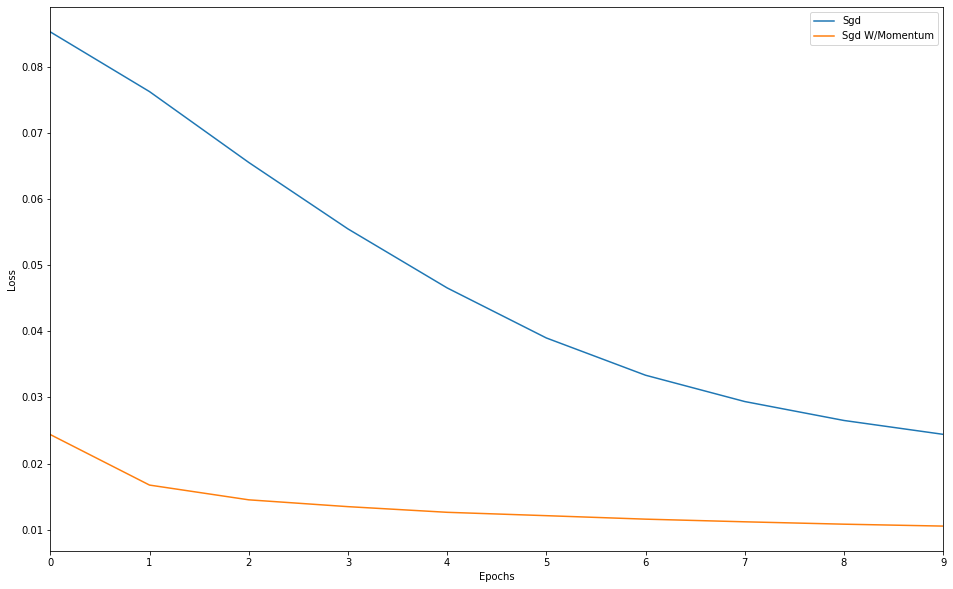

In [7]:
import matplotlib.pyplot as plt

def plot_history(histories):
  plt.figure(figsize=(16,10))

  for name, history in histories:
    plt.plot(history.epoch, history.history['val_loss'], label=name.title()) 

  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()

  plt.xlim([0,max(history.epoch)])
  
plot_history([('SGD', history_sgd),
              ('SGD w/momentum', history_sgdm)])